
# Лабораторная работа 2

## Выполнил: Морозов Алексей, группа М32071

## Вариант: 9, задачи 3, 5


In [12]:
import numpy as np
import scipy as scp
#import matplotlib as mplt
import matplotlib.pyplot as plt
import pandas as pd
from numpy import sqrt, pi, exp


## Задача 1

### Условие

Методом максимального правдоподобия найти оценку параметра $\theta$ биномиального распределения $Bin(n, \theta)$, считая $n$ известным. Найти смещение оценки, дисперсию, среднеквадратическую ошибку. Является ли найденная оценка эффективной? Эксперимент при $n = 4$, $\theta = \frac{1}{5}$

Сгенерируйте $500$ выборок объема $50$ с указанным значением параметра $\theta$. Сколько раз оценка отклонится от истинного значения параметра более чем на $0.01$? То же самое сделать для объемов выборки $100$, $500$, $1000$, $2500$. Визуализируйте результат. Как объяснить полученный результат?

In [13]:
n1 = 4
theta1 = 1/5
gen_count = 500
eps = 0.01


### Решение

Функция вероятности для биномиального распределения имеет вид
\begin{equation}
    p_Y\left(y\right) = P\left(Y = y\right) = \binom{n}{y}\theta^{y}\left(1-\theta\right)^{n-y}
\end{equation}

Пусть в результате $k$ испытаний при некотором значении параметра $\theta$ была получена выборка $X=\left(X_1,...,X_k\right)$. Так как распределение дискретно, вероятность, что величина $X$ примет значение $x_i$ при данном значении параметра равна $p_Y\left(x_i,\theta\right)=P_\theta\left(Y=x_i\right)$

Тогда можно ввести функцию правдоподобия $f\left(X,\theta\right)$ такую, что
\begin{equation}
    f\left(X,\theta\right)=\prod_{i=1}^{k}p_Y\left(x_i,\theta\right)
\end{equation}
и ее логарифмический аналог
\begin{equation}
    L\left(X,\theta\right)=\ln f\left(X,\theta\right)
\end{equation}

Оценка $\hat{\theta}$ параметра $\theta$ будет равна точке максимума функций $f\left(X,\theta\right)$ и $L\left(X,\theta\right)$ (так как их максимумы из-за монотонности $\ln$ совпадают)

Найдем логарифмическую функцию правдоподобия для данного распределения
\begin{equation}
    L\left(X,\theta\right) = \ln\left(\prod_{i=1}^{k}\binom{n}{x_i}\theta^{x_i}\left(1-\theta\right)^{n-x_i}\right) = \ln\prod_{i=1}^{k}\binom{n}{x_i} + \ln\left(\theta^{\sum_{i=1}^{k}x_i}\left(1-\theta\right)^{\sum_{i=1}^{k}n-x_i}\right) = \\ = \ln\prod_{i=1}^{k}\binom{n}{x_i} + \ln\left(\theta^{S_k}\left(1-\theta\right)^{kn-S_k}\right) = \ln\prod_{i=1}^{k}\binom{n}{x_i} + S_k\ln\theta + \left(kn-S_k\right)\ln\left(1-\theta\right)
\end{equation}

Максимум найдем, приравняв к $0$ производную по $\theta$
\begin{gather}
    \frac{\partial}{\partial\theta}L\left(X,\theta\right) = \frac{S_k}{\theta} - \frac{kn-S_k}{1-\theta} \\
    \frac{\partial}{\partial\theta}L\left(X,\theta\right) = 0 \\
    \frac{S_k}{\theta} - \frac{kn-S_k}{1-\theta} = 0 \\
    \frac{S_k}{\theta} = \frac{kn-S_k}{1-\theta} \\
    S_k - \theta S_k = \theta kn - \theta S_k \\
    \theta = \frac{S_k}{nk} = \frac{\bar{X_k}}{n}
\end{gather}

Итого, оценка методом максимального правдоподобия параметра $\theta$ равна
\begin{equation}
    \hat{\theta} = \frac{\bar{X_k}}{n}
\end{equation}

\begin{equation}
    \lim_{k\rightarrow\infty}{P\left(\left|\hat{\theta} - \theta\right| > \epsilon \right)} = \lim_{k\rightarrow\infty}{P\left(\left|\frac{\bar{X_k}}{n} - \theta\right| > \epsilon \right)}
\end{equation}

Из закона больших чисел следует, что $\bar{X_k}\xrightarrow{k\rightarrow\infty} EX = n\theta$, тогда $\frac{\bar{X_k}}{n} - \theta \xrightarrow{k\rightarrow\infty} 0$ и

\begin{equation}
    \lim_{k\rightarrow\infty}{P\left(\left|\hat{\theta} - \theta\right| > \epsilon \right)} = 0
\end{equation}

Оценка состоятельная

\begin{equation}
    E\hat{\theta} = E\left(\frac{\bar{X_k}}{n}\right) = \frac{E\bar{X_k}}{n} = \frac{n\theta}{n} = \theta
\end{equation}

Оценка несмещенная, ее смещение равно $B\left(\hat{\theta}\right) = \theta - E\hat{\theta} = 0$

\begin{equation}
    D\left(\hat{\theta}\right) = E\hat{\theta}^2 - \left(E\hat{\theta}\right)^2 = \frac{1}{n^2}E\left(\overline{X}^2\right) - \theta^2 = \frac{1}{n^2}\left(n^2\theta^2 + \frac{n\theta\left(1-\theta\right)}{k}\right) - \theta^2 = \frac{\theta\left(1-\theta\right)}{nk}
\end{equation}

\begin{equation}
    MSE\left(\hat{\theta}\right) = D\left(\hat{\theta}\right) + \left(B\left(\hat{\theta}\right)\right)^2 = \frac{\theta\left(1-\theta\right)}{nk}
\end{equation}

Эффективность оценки $\hat{\theta}$ можно проверить используя неравенство Рао-Крамера, которое, учитывая что оценка несмещенная и элементы выборки распределены одинаково, имеет вид
\begin{equation}
    D\left(\hat{\theta}\right) \geq \frac{1}{kI\left(\theta\right)}
\end{equation}
Если оценка такова, что в неравенстве достигается равенство, то данная оценка эффективна
\begin{equation}
    D\left(\hat{\theta}\right) = \frac{1}{kI\left(\theta\right)}
\end{equation}
Найдем информацию Фишера $I\left(\theta\right)$ в одном наблюдении
\begin{equation}
    I\left(\theta\right) = E_\theta\left(\frac{\partial}{\partial\theta}L\left(x,\theta\right)\right)^2 = E_\theta\left(\frac{x^2-2nx\theta+n^2\theta^2}{\theta^2\left(1-\theta\right)^2}\right) = \frac{n\theta-n\theta^2+n^2\theta^2-2n^2\theta^2+n^2\theta^2}{\theta^2\left(1-\theta\right)^2} = \frac{n}{\theta\left(1-\theta\right)}
\end{equation}

Подставляя $D\left(\hat{\theta}\right)$ и $I\left(\theta\right)$ получаем
\begin{equation}
    \frac{\theta\left(1-\theta\right)}{kn} = \frac{\theta\left(1-\theta\right)}{kn}
\end{equation}
Значит, полученная оценка эффективна

Итого, имеем что оценка $\hat{\theta}$ параметра $\theta$ состоятельна, не смещена и эффективна, а ее параметры равны
Смещение $B\left(\hat{\theta}\right) = 0$
Дисперсия $D\left(\hat{\theta}\right) = \frac{\theta\left(1-\theta\right)}{nk}$
СКО $MSE\left(\hat{\theta}\right) = \frac{\theta\left(1-\theta\right)}{nk}$

### Эксперимент

In [14]:
def count_diff_binom(size):
    counter = 0
    for i in range(gen_count):
        gen_arr_binom = scp.stats.binom.rvs(n=n1, p=theta1, size=size)
        p_est = gen_arr_binom.mean() / n1
        if abs(p_est - theta1) > eps:
            counter += 1
    return counter

In [15]:
diff_cnt = pd.DataFrame({'gen_size':[], 'diff_count':[]})
gen_sizes = [50, 100, 500, 1000, 2500]
for gen_size in gen_sizes:
    diff_cnt.loc[len(diff_cnt.index)] = [gen_size, count_diff_binom(gen_size)]
diff_cnt

,gen_size,diff_count
0,50,357
1,100,311
2,500,134
3,1000,57
4,2500,12


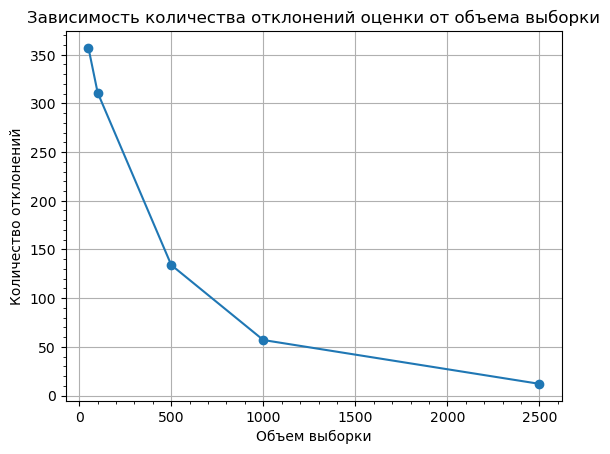

In [16]:
plt.plot(diff_cnt['gen_size'], diff_cnt['diff_count'], marker='o')
plt.grid()
plt.minorticks_on()
plt.title("Зависимость количества отклонений оценки от объема выборки")
plt.xlabel("Объем выборки")
plt.ylabel("Количество отклонений")
plt.show()

Нетрудно заметить, что с ростом объема выборки оценка все реже отклоняется от параметра. Объясняется это законом больших чисел, а конкретно - состоятельностью полученной оценки: при стремлении объема к бесконечности, оценка параметра стремится к самому параметру по вероятности
\begin{equation}
    \hat{\theta} \xrightarrow{P} \theta \text{  при } n\rightarrow\infty
\end{equation}


## Задача 2

### Условие

Найти оценку максимального правдоподобия параметра $\theta$ для распределения с плотностью
\begin{equation}
    f_\theta\left(x\right) = \frac{3x^2}{\sqrt{2\pi}}\exp{\left(-\frac{\left(\theta-x^3\right)^2}{2}\right)}
\end{equation}
Найти её смещение, дисперсию и среднеквадратическую ошибку. Какими свойствами
обладает данная оценка? Эксперимент при $\theta=5$

Сгенерируйте $500$ выборок объема $50$ с указанным значением параметра $\theta$. Сколько раз оценка отклонится от истинного значения параметра более чем на $0.01$? То же самое сделать для объемов выборки $100$, $500$, $1000$, $2500$. Визуализируйте результат. Как объяснить полученный результат?

In [17]:
theta2 = 5


### Решение

Также введем функцию правдоподобия $f\left(X,\theta\right)$ такую, что
\begin{equation}
    f\left(X,\theta\right) = \prod_{i=1}^{k}f_\theta\left(x_i\right)
\end{equation}
и ее логарифмический аналог
\begin{equation}
    L\left(X,\theta\right) = \ln f\left(X,\theta\right)
\end{equation}

Оценка $\hat{\theta}$ параметра $\theta$ будет равна точке максимума функций $f\left(X,\theta\right)$ и $L\left(X,\theta\right)$

Найдем логарифмическую функцию правдоподобия
\begin{equation}
    L\left(X,\theta\right) = \ln\left(\prod_{i=1}^{n}\frac{3x_i^2}{\sqrt{2\pi}}\exp{\left(-\frac{\left(\theta-x_i^3\right)^2}{2}\right)}\right) = \sum_{i=1}^n\ln\frac{3x_i^2}{\sqrt{2\pi}} - \sum_{i=1}^n\frac{\left(\theta-x_i^3\right)^2}{2}
\end{equation}

Максимум найдем, приравняв к $0$ производную по $\theta$
\begin{gather}
    \frac{\partial}{\partial\theta}L\left(X,\theta\right) = - \sum_{i=1}^n\theta - x_i^3 = -\left(n\theta - \sum_{i=1}^n x_i^3\right) \\
    \frac{\partial}{\partial\theta}L\left(X,\theta\right) = 0 \\
    n\theta - \sum_{i=1}^n x_i^3 = 0 \\
    \theta = \frac{\sum_{i=1}^n x_i^3}{n}
\end{gather}

Итого, оценка методом моментов параметра $\theta$ равна
\begin{equation}
    \hat{\theta} = \frac{\sum_{i=1}^n x_i^3}{n}
\end{equation}

Вычислим $EX^3$ и $EX^6$, которые позже понадобятся для определения свойств оценки
\begin{gather}
    EX^6 = \int_{-\infty}^{+\infty}x_i^6 f_\theta(x)dx = \theta^2 + 1 \\
    EX^3 = \int_{-\infty}^{+\infty}x_i^3 f_\theta(x)dx = \theta
\end{gather}
Оба интеграла были посчитаны методом численного интегрирования при разных $\theta$, а результат был проверен с помощью WolframAlpha
\begin{equation}
    DX^3 = EX^6 - \left(EX^3\right)^2 = \theta^2 + 1 - \theta^2 = 1
\end{equation}

\begin{equation}
    \lim_{k\rightarrow\infty}{P\left(\left|\hat{\theta} - \theta\right| > \epsilon \right)} = \lim_{k\rightarrow\infty}{P\left(\left|\frac{\sum_{i=1}^n x_i^3}{n} - \theta\right| > \epsilon \right)}
\end{equation}

Из закона больших чисел следует, что $\frac{\sum_{i=1}^n x_i^3}{n} \xrightarrow{n\rightarrow\infty} EX^3 = \theta$, тогда $\frac{\sum_{i=1}^n x_i^3}{n} - \theta \xrightarrow{n\rightarrow\infty} 0$ и

\begin{equation}
    \lim_{k\rightarrow\infty}{P\left(\left|\hat{\theta} - \theta\right| > \epsilon \right)} = 0
\end{equation}

Оценка состоятельная

\begin{equation}
    E\hat{\theta} = E\left(\frac{\sum_{i=1}^n x_i^3}{n}\right) = \frac{E\left(\sum_{i=1}^n x_i^3\right)}{n} = \frac{n\left(EX^3\right)}{n} = \frac{n\theta}{n} = \theta
\end{equation}

Оценка несмещенная, ее смещение равно $B\left(\hat{\theta}\right) = \theta - E\hat{\theta} = 0$

\begin{equation}
    D\left(\hat{\theta}\right) = E\hat{\theta}^2 - \left(E\hat{\theta}\right)^2 = \frac{1}{n^2}\left(E\left(\sum_{i=1}^n x_i^6\right) - E\left(\sum_{i=1}^n x_i^3\right)^2\right) = \frac{1}{n}\left(EX^6 - \left(EX^3\right)^2\right) = \frac{1}{n}\left(\theta^2 + 1 - \theta^2\right) = \frac{1}{n}
\end{equation}

\begin{equation}
    MSE\left(\hat{\theta}\right) = D\left(\hat{\theta}\right) + \left(B\left(\hat{\theta}\right)\right)^2 = \frac{1}{n}
\end{equation}

Эффективность оценки $\hat{\theta}$ можно проверить используя неравенство Рао-Крамера, которое, учитывая что оценка несмещенная и элементы выборки распределены одинаково, имеет вид
\begin{equation}
    D\left(\hat{\theta}\right) \geq \frac{1}{nI\left(\theta\right)}
\end{equation}
Если оценка такова, что в неравенстве достигается равенство, то данная оценка эффективна
\begin{equation}
    D\left(\hat{\theta}\right) = \frac{1}{nI\left(\theta\right)}
\end{equation}
Найдем информацию Фишера $I\left(\theta\right)$ в одном наблюдении
\begin{equation}
    I\left(\theta\right) = E_\theta\left(\frac{\partial}{\partial\theta}L\left(x,\theta\right)\right)^2 = E_\theta\left(-\left(\theta - x^3\right)\right)^2 = E_\theta\left(\theta^2 - 2\theta x^3 + x^6\right) = \theta^2 - 2\theta^2 + \theta + 1 = 1
\end{equation}

Подставляя $D\left(\hat{\theta}\right)$ и $I\left(\theta\right)$ получаем
\begin{equation}
    \frac{1}{n} = \frac{1}{n}
\end{equation}
Равенство достигнуто, значит, полученная оценка эффективна

\begin{equation}
    \sqrt n \left(\hat{\theta} - \theta\right) = \sqrt n \left(\frac{\sum_{i=1}^n x_i^3}{n} - \theta\right) = \frac{\sum_{i=1}^n x_i^3 - n\theta}{\sqrt n} = \frac{\sum_{i=1}^n x_i^3 - nEX^3}{\sqrt n} \xrightarrow[n\rightarrow\infty]{\text{ЦПТ}} N\left(0, DX^3\right) = N\left(0, 1\right)
\end{equation}
Получаем, что оценка асимптотически нормальна

Итого
Оценка $\hat{\theta}$ параметра $\theta$ состоятельная, не смещенная, эффективная и асимптотически нормальная
Смещение $B\hat{\theta} = 0$
Дисперсия $D\hat{\theta} = \frac{1}{n}$
СКО $MSE = \frac{1}{n}$


### Эксперимент

В связи с тем, что данную функцию плотности вероятности невозможно задать с помощью scipy из-за ее нестандартного вида и невозможности привести ее к другой известной функции плотности, для генерации выборки буду использовать метод, основанный на Rejection sampling

In [18]:
import random

def generate_sample():
    domain_min = 1
    domain_max = 2.5
    upper_bound = 3.532
    while True:
        x = random.uniform(domain_min, domain_max)
        y = random.uniform(0, upper_bound)
        pdf = (3 * x**2)/sqrt(2 * pi) * exp(-((5 - x**3)**2)/2)
        if y < pdf:
            return x

Проверю корректность генерации при размере выборки, равном $500$

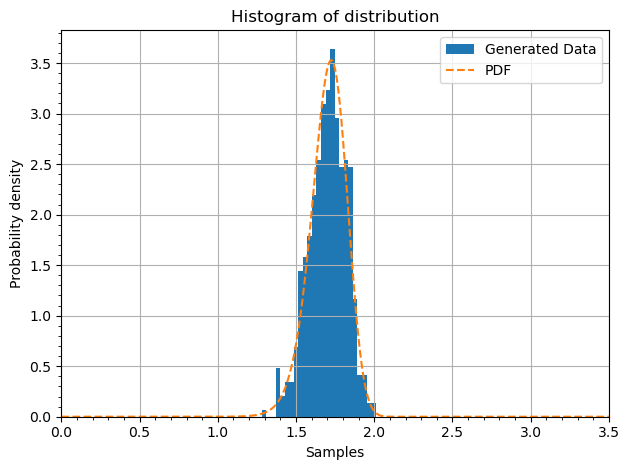

In [23]:
gen = np.empty(500)
for j in range(500):
    gen[j] = generate_sample()
fig, ax = plt.subplots()
n, bins, patches = plt.hist(gen, bins=25, density='True', label="Generated Data")
x = np.arange(0, 3.51, 0.01)
y = (3 * x**2)/sqrt(2 * pi) * exp(-((5 - x**3)**2)/2)
ax.plot(x, y, '--', label="PDF")
plt.grid()
plt.legend()
plt.minorticks_on()
plt.xlim(0, 3.5)
ax.set_title('Histogram of distribution')
ax.set_xlabel('Samples')
ax.set_ylabel('Probability density')
fig.tight_layout()
plt.show()

Видно, что генерация происходит корректно, и построенная гистограмма достаточно близка к графику данной плотности. При еще большем объеме выборки гистограмма будет *практически* повторять его. Однако, при выборке меньшего объема, точность будет падать

In [20]:
def count_diff_sample(size):
    counter = 0
    for i in range(gen_count):
        gen_arr_sample = np.empty(size)
        for j in range(size):
            gen_arr_sample[j] = generate_sample()
        p_est = np.sum(np.power(gen_arr_sample, 3)) / size
        if abs(p_est - theta2) > eps:
            counter += 1
    return counter

In [21]:
diff_cnt = pd.DataFrame({'gen_size':[], 'diff_count':[]})
gen_sizes = [50, 100, 500, 1000, 2500]
for gen_size in gen_sizes:
    diff_cnt.loc[len(diff_cnt.index)] = [gen_size, count_diff_sample(gen_size)]
diff_cnt

,gen_size,diff_count
0,50,450
1,100,453
2,500,398
3,1000,374
4,2500,318


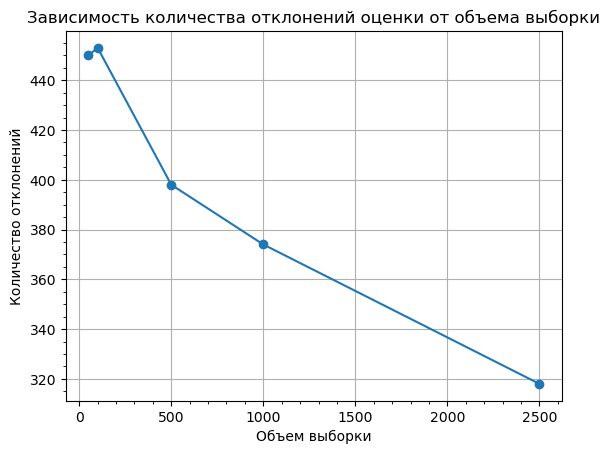

In [22]:
plt.plot(diff_cnt['gen_size'], diff_cnt['diff_count'], marker='o')
plt.grid()
plt.minorticks_on()
plt.title("Зависимость количества отклонений оценки от объема выборки")
plt.xlabel("Объем выборки")
plt.ylabel("Количество отклонений")
plt.show()

И снова, можно заметить, что с ростом объема выборки оценка все реже отклоняется от параметра. Объясняется это законом больших чисел, а конкретно - состоятельностью полученной оценки: при стремлении объема к бесконечности, оценка параметра стремится к самому параметру по вероятности

\begin{equation}
    \hat{\theta} \xrightarrow{P} \theta \text{  при } n\rightarrow\infty
\end{equation}